# Muestreo en Procesamiento de Imágenes

### El muestreo espacial reduce la resolución de una imagen ya que va tomando píxeles a intervalos regulares.

Importamos las librerias necesarias para el Laboratorio:

* NumPy para trabajar con matrices
* OpenCV (cv2) para procesar las imágenes
* Matplotlib para poder visualizar las imágenes

In [11]:
# Importamos las librerias
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [12]:
#Elegimos una imagen y la cargamos para trabajar con la misma
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/15004.jpg

--2025-04-18 17:45:51--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/15004.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39057 (38K) [image/jpeg]
Saving to: ‘15004.jpg.5’

15004.jpg.5         100%[===================>]  38.14K  --.-KB/s    in 0.02s   

2025-04-18 17:45:51 (2.30 MB/s) - ‘15004.jpg.5’ saved [39057/39057]



## Visualización y análisis de la imagen original

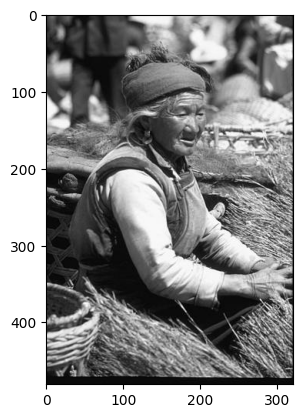

In [19]:
#Leemos la imagen seleccionada utilizando metodo imread de libreria cv2 y la asignamos a variable "img"
img = imread('15004.jpg')
plt.imshow(img)
plt.show()

In [14]:
#Se define función para obenter información de la imagen
def info_img(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto (más blanco)
    print('Mínimo =', np.min(img))   # Valor más bajo (más negro)
#Se ejecuta función
info_img(img)

Tamaño = (481, 321, 3)
Máximo = 255
Mínimo = 0


In [16]:
#Vamos a realizar una copia de la imagen seleccionada y la asignamos a variable "X" para luego utilizar un solo canal
X = img.copy()
# Vamos a utilizar solo el primer canal de la imagen (rojo)
X = X[:,:,0]

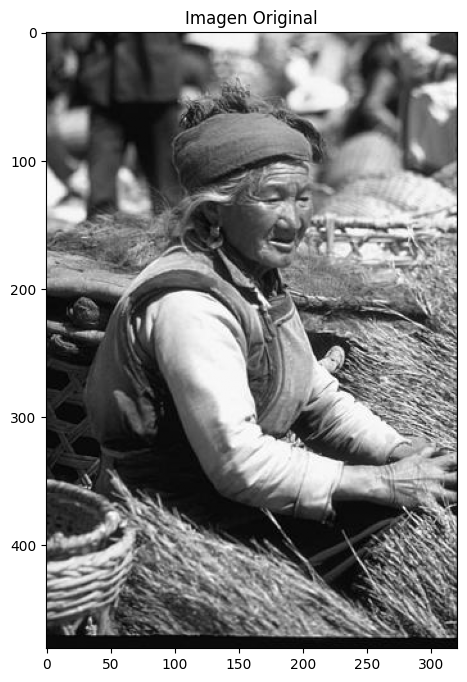

Tamaño = (481, 321)
Máximo = 255
Mínimo = 0


In [18]:
# Mostramos la imagen original en un tamaño especifico y en escala de grises
plt.figure(figsize=(8,8))
plt.imshow(X, cmap='gray')
plt.title('Imagen Original')
plt.show()
info_img(X)

## Muestreo Espacial

Para llevar a cabo el proceso vamos a ir tomando píxeles en distintos intervalos regulares, para luego utilizarlos y así formar una nueva imagen. Vamos a comenzar copiando 1 pixel cada 2 pixeles de la imagen original y lo vamos a guardar en una nueva matriz (factor 2), luego haremos los mismo pero cada 4 pixeles y por ultimo cada 8 pixeles.  

In [20]:
da = 2   # Factor de muestreo: toma 1 pixel cada 'da' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,da)         # Crea secuencia de 0 a Nx saltando de da en da
jx = range(0,Mx,da)         # Igual para columnas
Nya = len(ix)               # Nueva altura = número de filas a tomar
Mya = len(jx)               # Nueva anchura = número de columnas a tomar

In [21]:
# Se crea ciclo de extracción de pixeles para armar nueva imagen muestreada "Ya"
Ya = np.zeros((Nya,Mya), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Nya):              # Para cada fila
    for j in range(Mya):          # Para cada columna
        Ya[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

In [22]:
#Llevamos a cabo el mismo proceso anterior, pero esta vez con otro Factor de muestreo
db = 4
(Nx,Mx) = X.shape
ix = range(0,Nx,db)
jx = range(0,Mx,db)
Nyb = len(ix)
Myb = len(jx)

In [23]:
# Se crea ciclo de extracción de pixeles para armar nueva imagen muestreada "Yb"
Yb = np.zeros((Nyb,Myb), np.uint8)
for i in range(Nyb):
    for j in range(Myb):
        Yb[i,j] = X[ix[i],jx[j]]

In [24]:
#Llevamos a cabo el mismo proceso anterior, pero esta vez con otro Factor de muestreo
dc = 8
(Nx,Mx) = X.shape
ix = range(0,Nx,dc)
jx = range(0,Mx,dc)
Nyc = len(ix)
Myc = len(jx)

In [25]:
# Se crea ciclo de extracción de pixeles para armar nueva imagen muestreada "Yc"
Yc = np.zeros((Nyc,Myc), np.uint8)
for i in range(Nyc):
    for j in range(Myc):
        Yc[i,j] = X[ix[i],jx[j]]

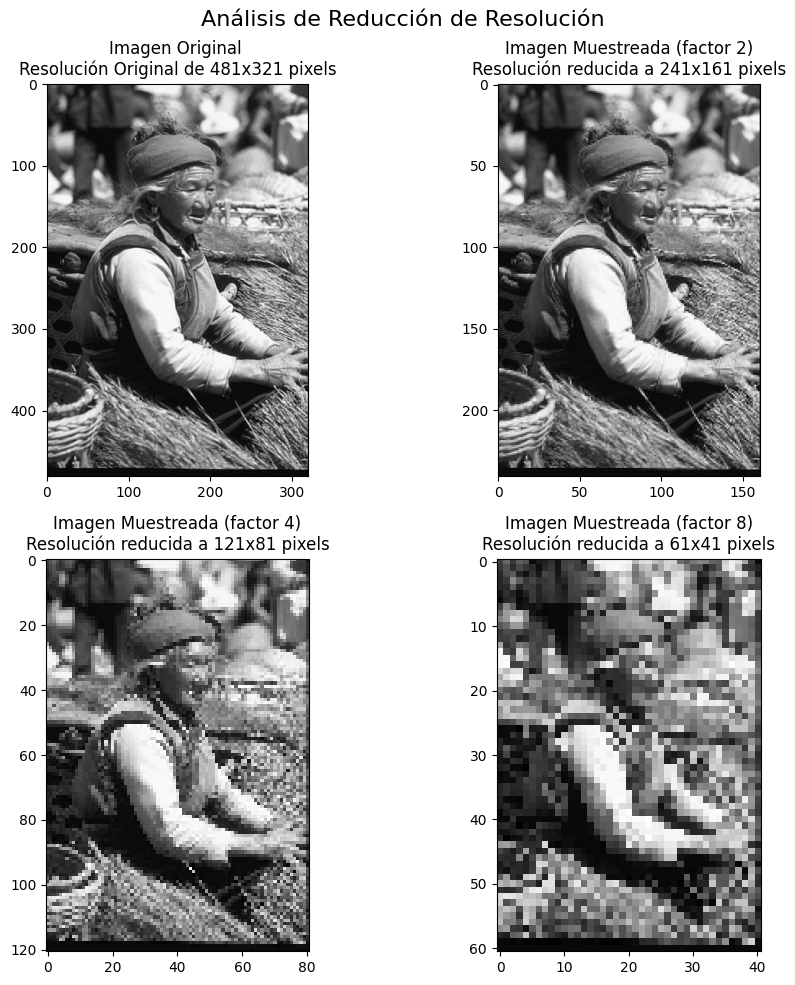

In [27]:
#Vamos a mostrar la imagen original y las imagenes creadas con los distintos factores para apreciar los cambios
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Análisis de Reducción de Resolución', fontsize=16)

# Imagen Original
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Imagen Original \n' f'Resolución Original de {Nx}x{Mx} pixels')

# Factor 2
axes[0,1].imshow(Ya, cmap='gray')
axes[0,1].set_title(f'Imagen Muestreada (factor {da})\n' f'Resolución reducida a {Nya}x{Mya} pixels')


# Factor 4
axes[1,0].imshow(Yb, cmap='gray')
axes[1,0].set_title(f'Imagen Muestreada (factor {db})\n' f'Resolución reducida a {Nyb}x{Myb} pixels')


# Factor 8
axes[1,1].imshow(Yc, cmap='gray')
axes[1,1].set_title(f'Imagen Muestreada (factor {dc})\n' f'Resolución reducida a {Nyc}x{Myc} pixels')


plt.tight_layout()
plt.show()

###Al experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) observamos que en las distintas pruebas llevadas a cabo se aprecia una perdida de calidad visual de la imagen original utilizada. En cuanto al tamaño de las imágenes se observa una reducción que es proporcional al factor ingresado. Por último se puede observar una notoria perdida de calidad a partir del factor 4.